# TimML Notebook 1
## Single layer flow

Consider uniform flow from East to West. The gradient is 0.001. The hydraulic conductivity is $k=10$ m/d. The aquifer bottom and top are at 0 m and 10 m. The head at $x=-1000$ m and $y=0$ is fixed at 41 m. 

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
ml = ModelMaq(kaq=10, z=[10, 0])

In [3]:
rf = Constant(ml, xr=-1000, yr=0, hr=41)

In [4]:
uf = Uflow(ml, slope=0.001, angle=0)

In [5]:
ml.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


<IPython.core.display.Javascript object>


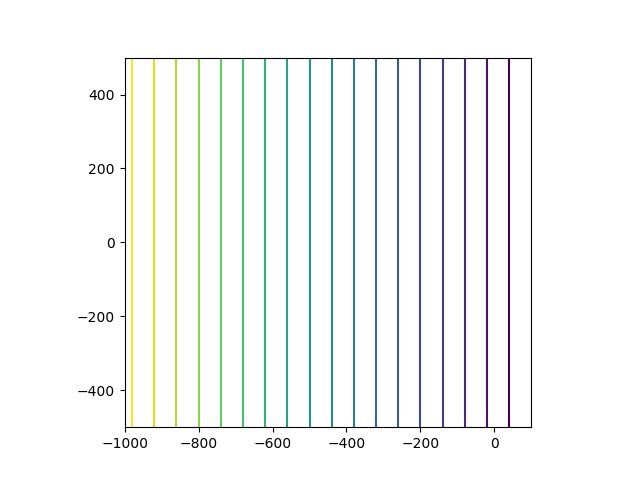

In [14]:
ml.contour(x1=-1000, x2=100, nx=50, y1=-500, y2=500, ny=50, 
           layers=1, levels=20)

A well is located at $(x,y)=(-400,0)$ with a discharge $Q=50$ m$^3$ and a radius of 0.2 m.

In [15]:
w = Well(ml, xw=-400, yw=0, Qw=50., rw=0.2)

After the well is added (or any other elements), the model needs to be solved again. A contour plot is created and a 10 strace line are added. The stepsize is given in meters and represents the largest space step that is taken, but it is reduced when certain accuracy constraints are not met. Note that, after running the code cell below, for each trace line it is printed to the screen what the reason was that the traceline was aborted. In this case it was either because the trace line reached a well or reached the maximum number of steps (the default is 100 steps, but this can be changed by specifying the `nstepmax` keyword).  

Number of elements, Number of equations: 3 , 1
...
solution complete


<IPython.core.display.Javascript object>


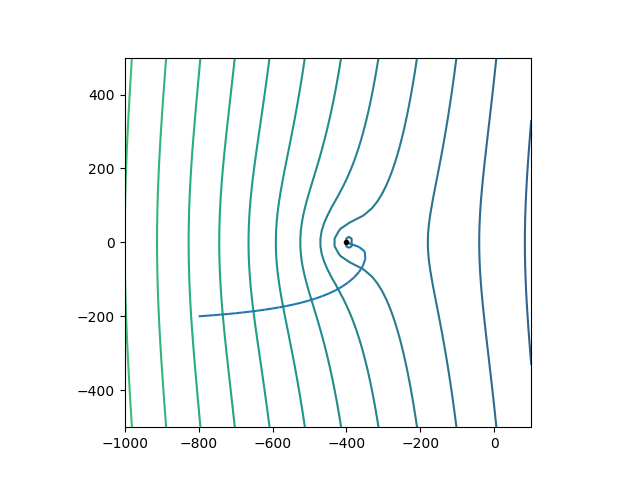

.

In [17]:
ml.solve()
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=1)
fig = gcf()
ml.tracelines(-800 * np.ones(1), -200 * np.ones(1), np.zeros(1), hstepmax=20)

### Exercise a
Draw 10 tracelines from $x=-800$ and different values of $y$.

<IPython.core.display.Javascript object>


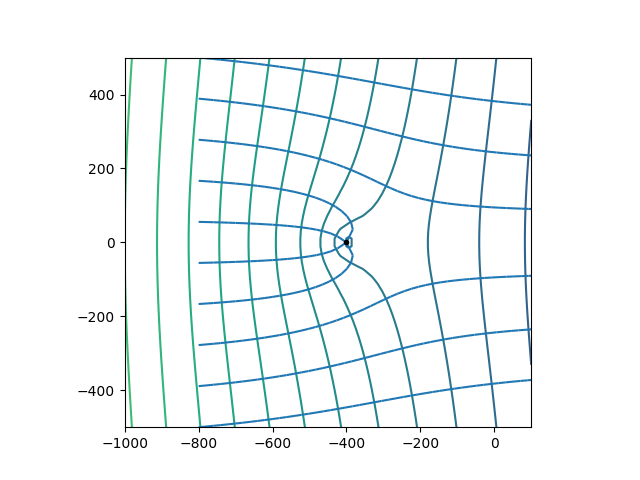

..........

In [19]:
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=1)
ml.tracelines(10 * [-800], linspace(-500, 500, 10), np.zeros(10), hstepmax=20)

### Exercise b
Quadruple the discharge of the well and reproduce the same figure

Number of elements, Number of equations: 3 , 1
...
solution complete


<IPython.core.display.Javascript object>


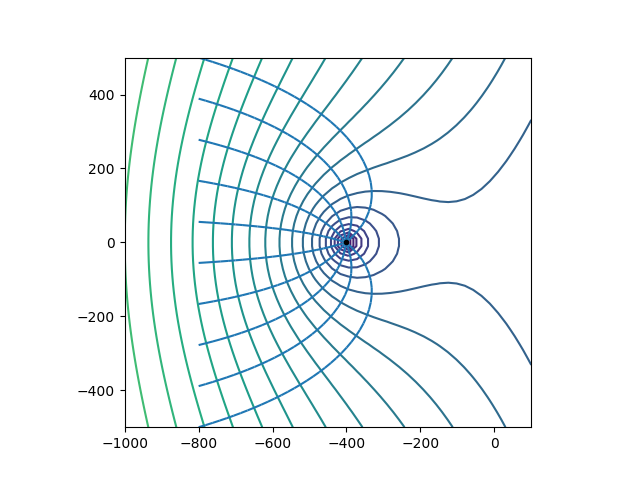

..........('head at well:', array([ 37.85129405]))


In [10]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ml.solve()
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=0)
ml.tracelines(10 * [-800], linspace(-500, 500, 10), np.zeros(10), hstepmax=20)
print(('head at well:', w.headinside()))

### Add a river
A river runs along $x=0$. The water level in the river is at 40 m.

Number of elements, Number of equations: 4 , 2
....
solution complete


<IPython.core.display.Javascript object>


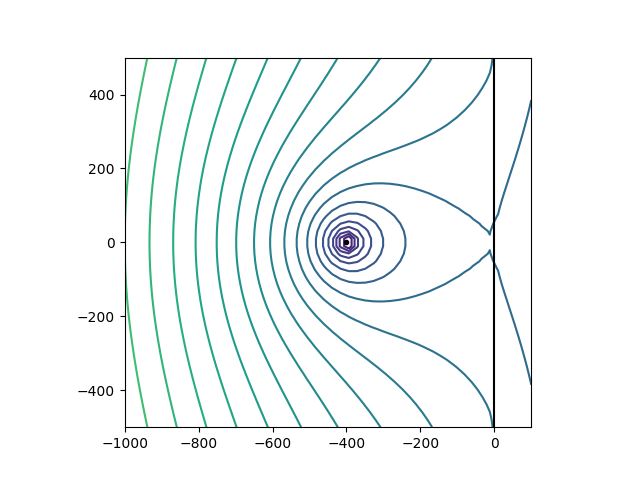

('head at well:', array([ 37.90853612]))


In [11]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
ls1 = HeadLineSink(ml, 0, -500, 0, 500, 40)
ml.solve()
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=0)
print(('head at well:', w.headinside()))

### Exercise c
Simulate the river with 20 line-sinks from $y=-800$ to $y=800$. 

Number of elements, Number of equations: 4 , 21
....
solution complete


<IPython.core.display.Javascript object>


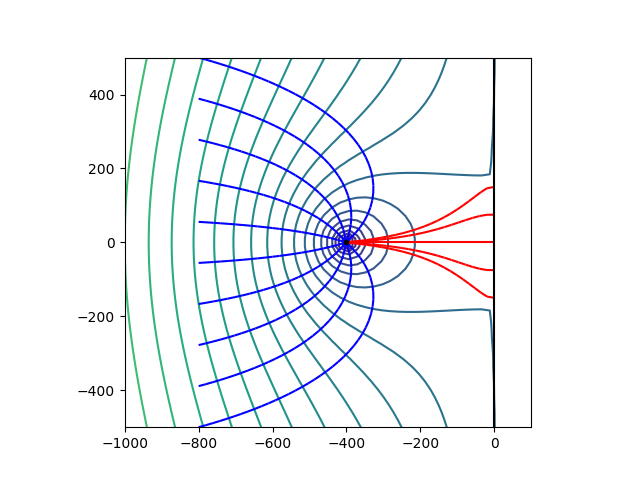

...............

In [12]:
ml = ModelMaq(kaq=10, z=[10, 0])
rf = Constant(ml, xr=-1000, yr=0, hr=41)
uf = Uflow(ml, slope=0.001, angle=0)
w = Well(ml, xw=-400, yw=0, Qw=200, rw=0.2)
xls = np.zeros(21)
yls = np.linspace(-800, 800, 21)
ls = HeadLineSinkString(ml, xy=list(zip(xls, yls)), hls=40, layers=0)
ml.solve()
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=0)
ml.tracelines(-800 * np.ones(10), np.linspace(-500, 500, 10), np.zeros(10), hstepmax=20, color='b')
ml.tracelines(-0.01 * np.ones(5), np.linspace(-150, 150, 5), np.zeros(5), hstepmax=20, color='r')

### Capture zone
Create a five year capture zone. You may want to create a contour plot first.

<IPython.core.display.Javascript object>


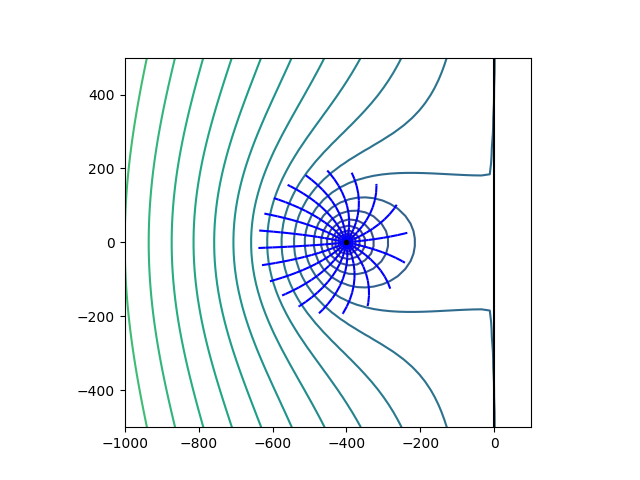

....................

In [13]:
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=0)
w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=5 * 365.25, color='b')

### Exercise d
Create a 20 year capture zone using 20 tracelines.

<IPython.core.display.Javascript object>


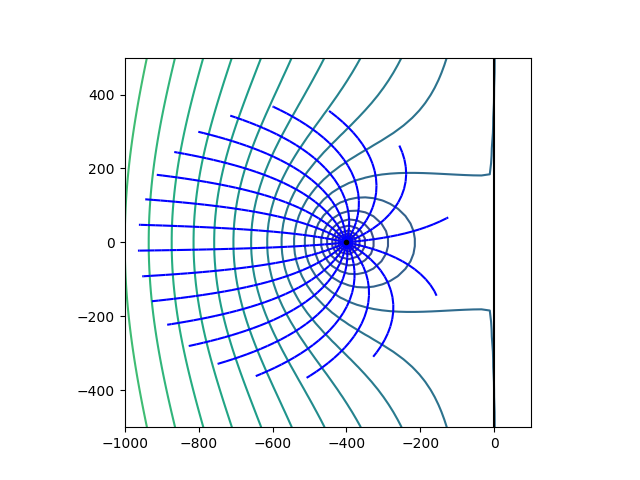

....................

In [14]:
ml.contour(-1000, 100, 50, -500, 500, 50, levels=np.arange(39, 42, 0.1), layers=0)
w.plotcapzone(hstepmax=20, nt=20, zstart=0, tmax=20 * 365.25, color='b')

In [15]:
ml.aq.naq

1